## 5.3.4 线性回归综合实践
&emsp;&emsp;利用Python实现线性回归分析的基本步骤如下：  
&emsp;&emsp;（1）依次导入相关库。  
&emsp;&emsp;（2）数据预处理：导入或者读取数据集，必要时将分类数据数字化，划分数据集为训练集和测试集。  
&emsp;&emsp;（3）在训练集上训练线性回归模型。  
&emsp;&emsp;（4）在测试集上预测结果。  
&emsp;&emsp;（5）模型评估。  
&emsp;&emsp;（6）结果可视化对比。

&emsp;&emsp;**例5-3-1** 利用糖尿病数据集，实现一元线性回归分析。 

&emsp;&emsp;糖尿病数据集由sklearn提供，该数据集包含442个糖尿病病例的10项检查数据，以及这些病例检查后一年疾病进展的定量测量结果。 数据集有442行记录，11列。其中前10列为10个特征的检查数据，10个特征分别为：年龄，性别，体重指数，平均血压，以及6个血清学测量值S1，S2，S3，S4，S5，S6，特征取值范围为(-0.2,0.2)。第11列标签列为一年后的定量测量值。标签取值范围是\[25,346]。我们可以通过以下代码加载和查看该数据集：

In [1]:
from sklearn import datasets  
# 加载数据集
diabetes = datasets.load_diabetes() 
# 显示其描述
print("【描述】\n", diabetes.DESCR)
# 显示其特征名称
print("【特征名称】\n", diabetes.feature_names)
# 显示其特征数据
print("【数据】\n", diabetes.data)
# 显示其标签数据
print("【目标值】\n", diabetes.target)

【描述】
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feat

&emsp;&emsp;本例利用糖尿病数据集中的第三个特征数据，拟合回归模型，拟合出的直线使数据集中观察到的真实值与预测值之间的残差平方和最小。并输出均方差、决定系数，将结果进行可视化对比。

&emsp;&emsp;程序实现代码如下：

#### （1）导入库
&emsp;&emsp;matplotlib.pyplot用于可视化图表，sklearn.datasets用于导入数据加载器，sklearn.linear_model用于建立回归模型，sklearn.metrics.mean_squared_error用于计算均方差，sklearn.metrics.r2_score用于计算决定系数$R^2$。

In [2]:
# （1）导入库
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### （2）导入数据集并划分数据集
&emsp;&emsp;语句diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)，加载糖尿病数据集所有数据到变量diabetes_X和diabetes_y。

&emsp;&emsp;语句diabetes_X = diabetes_X\[:, np.newaxis, 2]，只选取数据集的第三个特征存入变量diabetes_X；diabetes_X数据集共有442行10列
（442\*10），参数np.newaxis的功能是插入一个新的维度。此处把diabetes_X数据集转换成442\*1\*10，在第三个维度中的10个系列中选取第一个特征列（442\*1）。  

&emsp;&emsp;语句diabetes_X_train = diabetes_X\[:-20]，使用数组切片设置数据diabetes_X前422个病例数据为训练集diabetes_X_train。  

&emsp;&emsp;语句diabetes_X_test = diabetes_X\[-20:]，使用数组切片设置数据diabetes_X后20个病例数据为测试集diabetes_X_test。  

&emsp;&emsp;语句diabetes_y_train = diabetes_y\[:-20]，使用数组切片设置目标数据diabetes_y前422个病例数据为目标训练集diabetes_y_train。 

&emsp;&emsp;语句diabetes_y_test = diabetes_y\[-20:]，使用数组切片设置目标数据diabetes_y后20个病例数据为目标测试集diabetes_y_test。
- 参数np.newaxis的用法补充解释

&emsp;&emsp;np.newaxis功能是索引多维数组的某一列时，返回的是一个行向量。如对于数组X，  

&emsp;&emsp;设X = np.array(\[\[1, 2, 3, 4],  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;\[5, 6, 7, 8],  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;\[9, 10, 11, 12]  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;])，  

&emsp;&emsp;则X\[:, 2]为\[3  7  11]，X\[:, 2]把X中的第三列数据显示为了一行。但是，如果索引多维数组的某一列，想要返回的仍然是列的结构时，可以采用：X\[:, 2]\[:, np.newaxis]或X\[:,np.newaxis,2]，获得如下形式的结果：  
\[\[3]  
&nbsp;\[7]   
&nbsp;\[11]]  

In [3]:
# （2）加载糖尿病数据集 
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# 只使用糖尿病数据集的第三个特征
diabetes_X = diabetes_X[:, np.newaxis, 2]
# 分割数据为训练集和测试集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# 分割目标数据为训练集和测试集
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

#### （3）创建回归模型对象并训练模型
&emsp;&emsp;语句regr = linear_model.LinearRegression()，实例化线性回归对象regr。 

&emsp;&emsp;语句regr.fit(diabetes_X_train, diabetes_y_train)，调用对象regr的fit方法使用训练集训练模型，求出了系数矩阵coefficient，并计算出了均方误差和方差。

In [4]:
#（3）创建线性回归模型对象
regr = linear_model.LinearRegression()
#使用训练集训练模型，拟合直线
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

#### （4）使用测试集实现预测
&emsp;&emsp;语句diabetes\_y\_pred = regr.predict(diabetes\_X\_test)，基于测试集进行预测，计算出预测目标值。 

&emsp;&emsp;语句print('Coefficients: \n', regr.coef\_)，输出回归系数regr.coef_。

In [5]:
#（4）使用测试集实现预测
diabetes_y_pred = regr.predict(diabetes_X_test)
#输出回归系数
print('Coefficients:', regr.coef_)

Coefficients: [938.23786125]


#### （5）模型评估
&emsp;&emsp;语句print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))和语句print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))，分别计算并输出均方误差（MSE）和决定系数$R^2$。

In [6]:
#（5）模型评估
# 计算并输出均方差
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# 计算并输出决定系数R2 
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07
Coefficient of determination: 0.47


#### （6）绘图输出
&emsp;&emsp;语句plt.scatter(diabetes_X_test, diabetes_y_test, color='black')，绘制黑色散点图。

&emsp;&emsp;语句plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)，绘制蓝色、线宽为3的折线图。

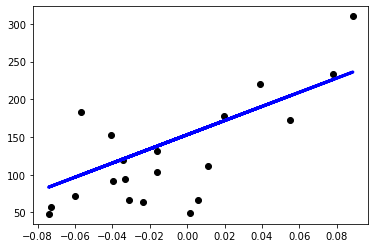

In [7]:
#（6）绘图输出
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

&emsp;&emsp;**例5-3-2** 利用波士顿房价数据集，实现多元线性回归分析。

&emsp;&emsp;sklearn也提供了波士顿房价数据集。该数据集包含506条记录，13个特征指标，第14列通常为目标列房价。试图能找到那些指标与房价的关系。13个特征依次为：城镇人均犯罪率CRIM、超过2.5万平方英尺的住宅用地比例ZN、城镇非零售商业面积比例INDUS、是否靠近Charles河CHAS、氮氧化物浓度NOX、每户住宅的平均房间数RM、1940年以前建造的自住单位比例AGE、到波士顿五个就业中心的加权距离DIS、到高速公路的可达性指数RAD、每万元全额物业税税率TAX、城镇师生比例PTRATIO、与黑人相关的指标B、低地位人口率LSTAT、业主自住房屋的均值MEDV。  

&emsp;&emsp;本例首先将506组数据的数据集划分为训练集和测试集，其中404是训练样本，剩下的102组数据作为验证样本。然后构建回归模型并训练模型，查看模型的13个特征的系数以及截距，获取模型的预测结果与测试集的值，最后绘制折线图对比预测值和真实值。 

&emsp;&emsp;程序实现代码如下：

#### （1）导入库
&emsp;&emsp;sklearn.datasets用于导入数据加载器，sklearn.model_selection用于数据选择，sklearn.linear_model用于建立回归模型，matplotlib.pyplot和rcParams用于可视化图表。

In [8]:
# （1）导入库
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import rcParams

#### （2）加载数据集并划分数据集
&emsp;&emsp;语句load_boston()，加载波士顿房价数据集，该数据集包含13个特征506条记录。

&emsp;&emsp;语句x=boston\['data']，获取数据集的所有数据赋给变量x。

&emsp;&emsp;语句y=boston\['target']，获取数据集的目标值赋给变量y。 

&emsp;&emsp;语句names=boston\['feature_names']，获取数据集的特征名称赋给变量names。  

&emsp;&emsp;语句x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)，划分数据集为训练集和测试集，语句中x_train表示划分出的训练集数据（返回值）；x_test表示划分出的测试集数据（返回值）；y_train表示划分出的训练集标签（返回值）；y_test表示划分出的测试集标签（返回值）。该例中测试集数据为所有数据的20%共102条，训练集数据为404条。  

&emsp;&emsp;语句print('x_train前3行数据为：', x_train\[0:3],'\n', 'y_train前3行数据为：',y_train\[0:3]),运行结果如下所示。

In [9]:
# （2）加载数据集 
boston=load_boston()
x=boston['data']
y=boston['target']
names=boston['feature_names']
# 分割数据为训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
print('x_train前3行数据为：', x_train[0:3],'\n', 'y_train前3行数据为：',y_train[0:3])

x_train前3行数据为： [[2.24236e+00 0.00000e+00 1.95800e+01 0.00000e+00 6.05000e-01 5.85400e+00
  9.18000e+01 2.42200e+00 5.00000e+00 4.03000e+02 1.47000e+01 3.95110e+02
  1.16400e+01]
 [2.61690e-01 0.00000e+00 9.90000e+00 0.00000e+00 5.44000e-01 6.02300e+00
  9.04000e+01 2.83400e+00 4.00000e+00 3.04000e+02 1.84000e+01 3.96300e+02
  1.17200e+01]
 [6.89900e-02 0.00000e+00 2.56500e+01 0.00000e+00 5.81000e-01 5.87000e+00
  6.97000e+01 2.25770e+00 2.00000e+00 1.88000e+02 1.91000e+01 3.89150e+02
  1.43700e+01]] 
 y_train前3行数据为： [22.7 19.4 22. ]


#### （3）创建线性回归模型对象并训练模型
&emsp;&emsp;语句lr=LinearRegression()，实例化线性回归对象。

&emsp;&emsp;语句lr.fit(x\_train,y\_train)，使用训练集训练模型。

&emsp;&emsp;语句print(lr)与语句print(lr.coef\_)及语句print(lr.intercept_)，分别输出与模型及13个特征的系数以及截距。

In [10]:
# （3）创建线性回归模型对象
lr=LinearRegression()
#使用训练集训练模型
lr.fit(x_train,y_train)
#显示模型
print(lr)
#显示模型13个系数
print(lr.coef_)
#显示模型截距
print(lr.intercept_ )

LinearRegression()
[-1.01199845e-01  4.67962110e-02 -2.06902678e-02  3.58072311e+00
 -1.71288922e+01  3.92207267e+00 -5.67997339e-03 -1.54862273e+00
  2.97156958e-01 -1.00709587e-02 -7.78761318e-01  9.87125185e-03
 -5.25319199e-01]
32.42825286699149


#### （4）使用测试集实现预测
&emsp;&emsp;语句print(lr.predict(x_test\[:5]))，基于测试集中的前5个样本进行预测，输出前5个预测值。

In [11]:
# （4）使用测试集获取预测结果
print(lr.predict(x_test[:5]))

[27.99617259 31.37458822 21.16274236 32.97684211 19.85350998]


#### （5）模型评估
&emsp;&emsp;语句print(lr.score(x_test,y_test))，计算并输出决定系数$R^2$。

In [12]:
# （5）模型评估
# 计算并输出决定系数R2
print(lr.score(x_test,y_test))

0.7657465943591123


#### （6）绘图对比
&emsp;&emsp;语句plt.plot(range(y_test.shape\[0]),y_test,color="blue",linewidth=1.5,linestyle="-")和语句plt.plot(range(y_test.shape\[0]),y_pred,color="red",linewidth=1.5,linestyle="-.")，使用matplotlib.pyplot对象绘制预测值和真实值对比的折线图。

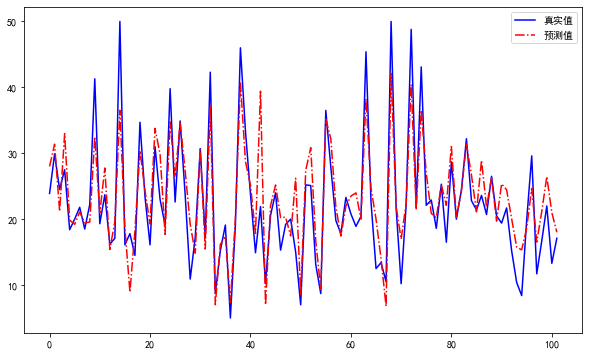

In [13]:
# （6）绘图对比预测值和真实值
rcParams['font.sans-serif']='SimHei'
fig=plt.figure(figsize=(10,6))
y_pred=lr.predict(x_test)
plt.plot(range(y_test.shape[0]),y_test,color="blue",linewidth=1.5,linestyle="-")
plt.plot(range(y_test.shape[0]),y_pred,color="red",linewidth=1.5,linestyle="-.")
plt.legend(['真实值','预测值'])
plt.show()